In [1]:
from ultralytics import YOLO
from dotenv import load_dotenv
import os
from pathlib import Path

load_dotenv(".env",override=True)

model = YOLO(os.getenv("PATH_YOLO_BEST"))  # load a custom model

# Validate the model
metrics = model.val(data= Path(os.getenv("PATH_YAML")).resolve().as_posix(),split="test")  # no arguments needed, dataset and settings remembered

Ultralytics YOLOv8.2.46  Python-3.12.4 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 2060 SUPER, 8192MiB)
YOLOv8m summary (fused): 218 layers, 25844392 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning C:\Users\doger\GitHub\Progetto_ml\euro\test\labels.cache... 62 images, 3 backgrounds, 0 corrupt: 100%|██████████| 62/62 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.42s/it]


                   all         62        280        0.8      0.738      0.826      0.784
                     1          9         14      0.735      0.643       0.81       0.75
                    10         13        103      0.842      0.414      0.659      0.597
                   100          5         18      0.944      0.942      0.984      0.918
                     2         10         12       0.62      0.667      0.705      0.688
                    20         13         50      0.372      0.641      0.629      0.597
                   200         17         27      0.986      0.963      0.993      0.967
                     5          8         31      0.902       0.89      0.942      0.895
                    50         23         25          1      0.742      0.887      0.857
Speed: 1.8ms preprocess, 17.2ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs\detect\val6


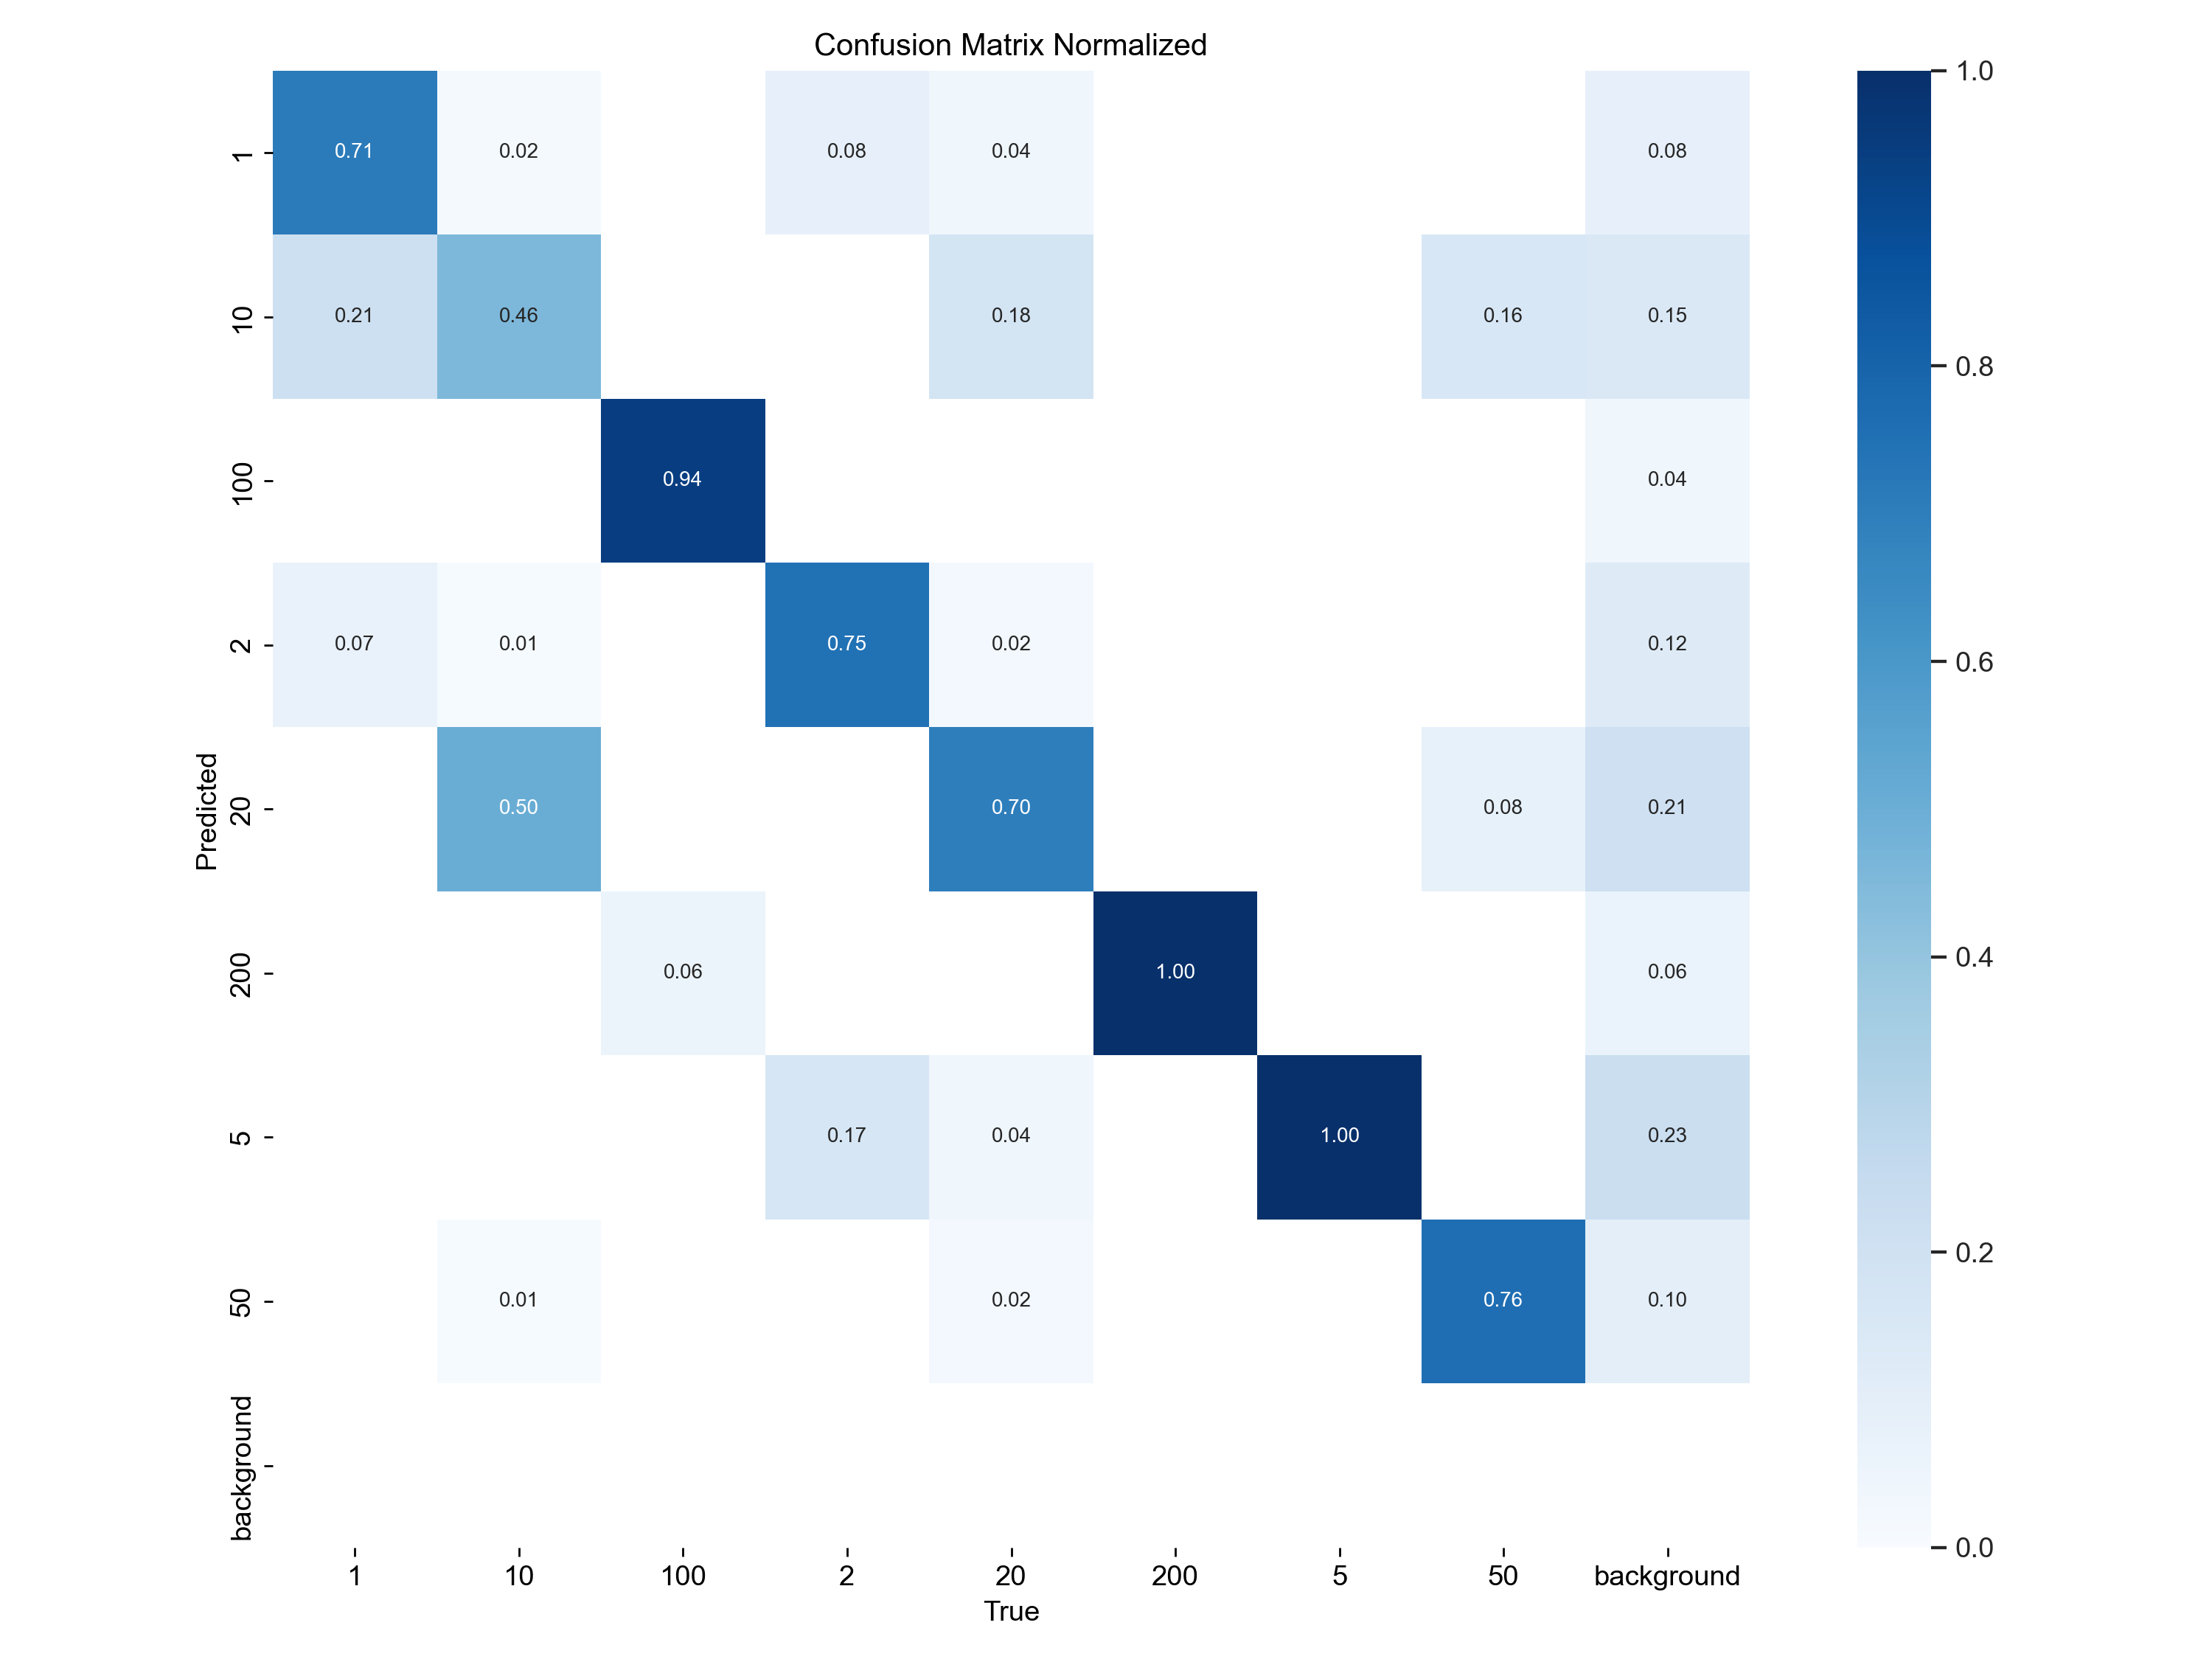

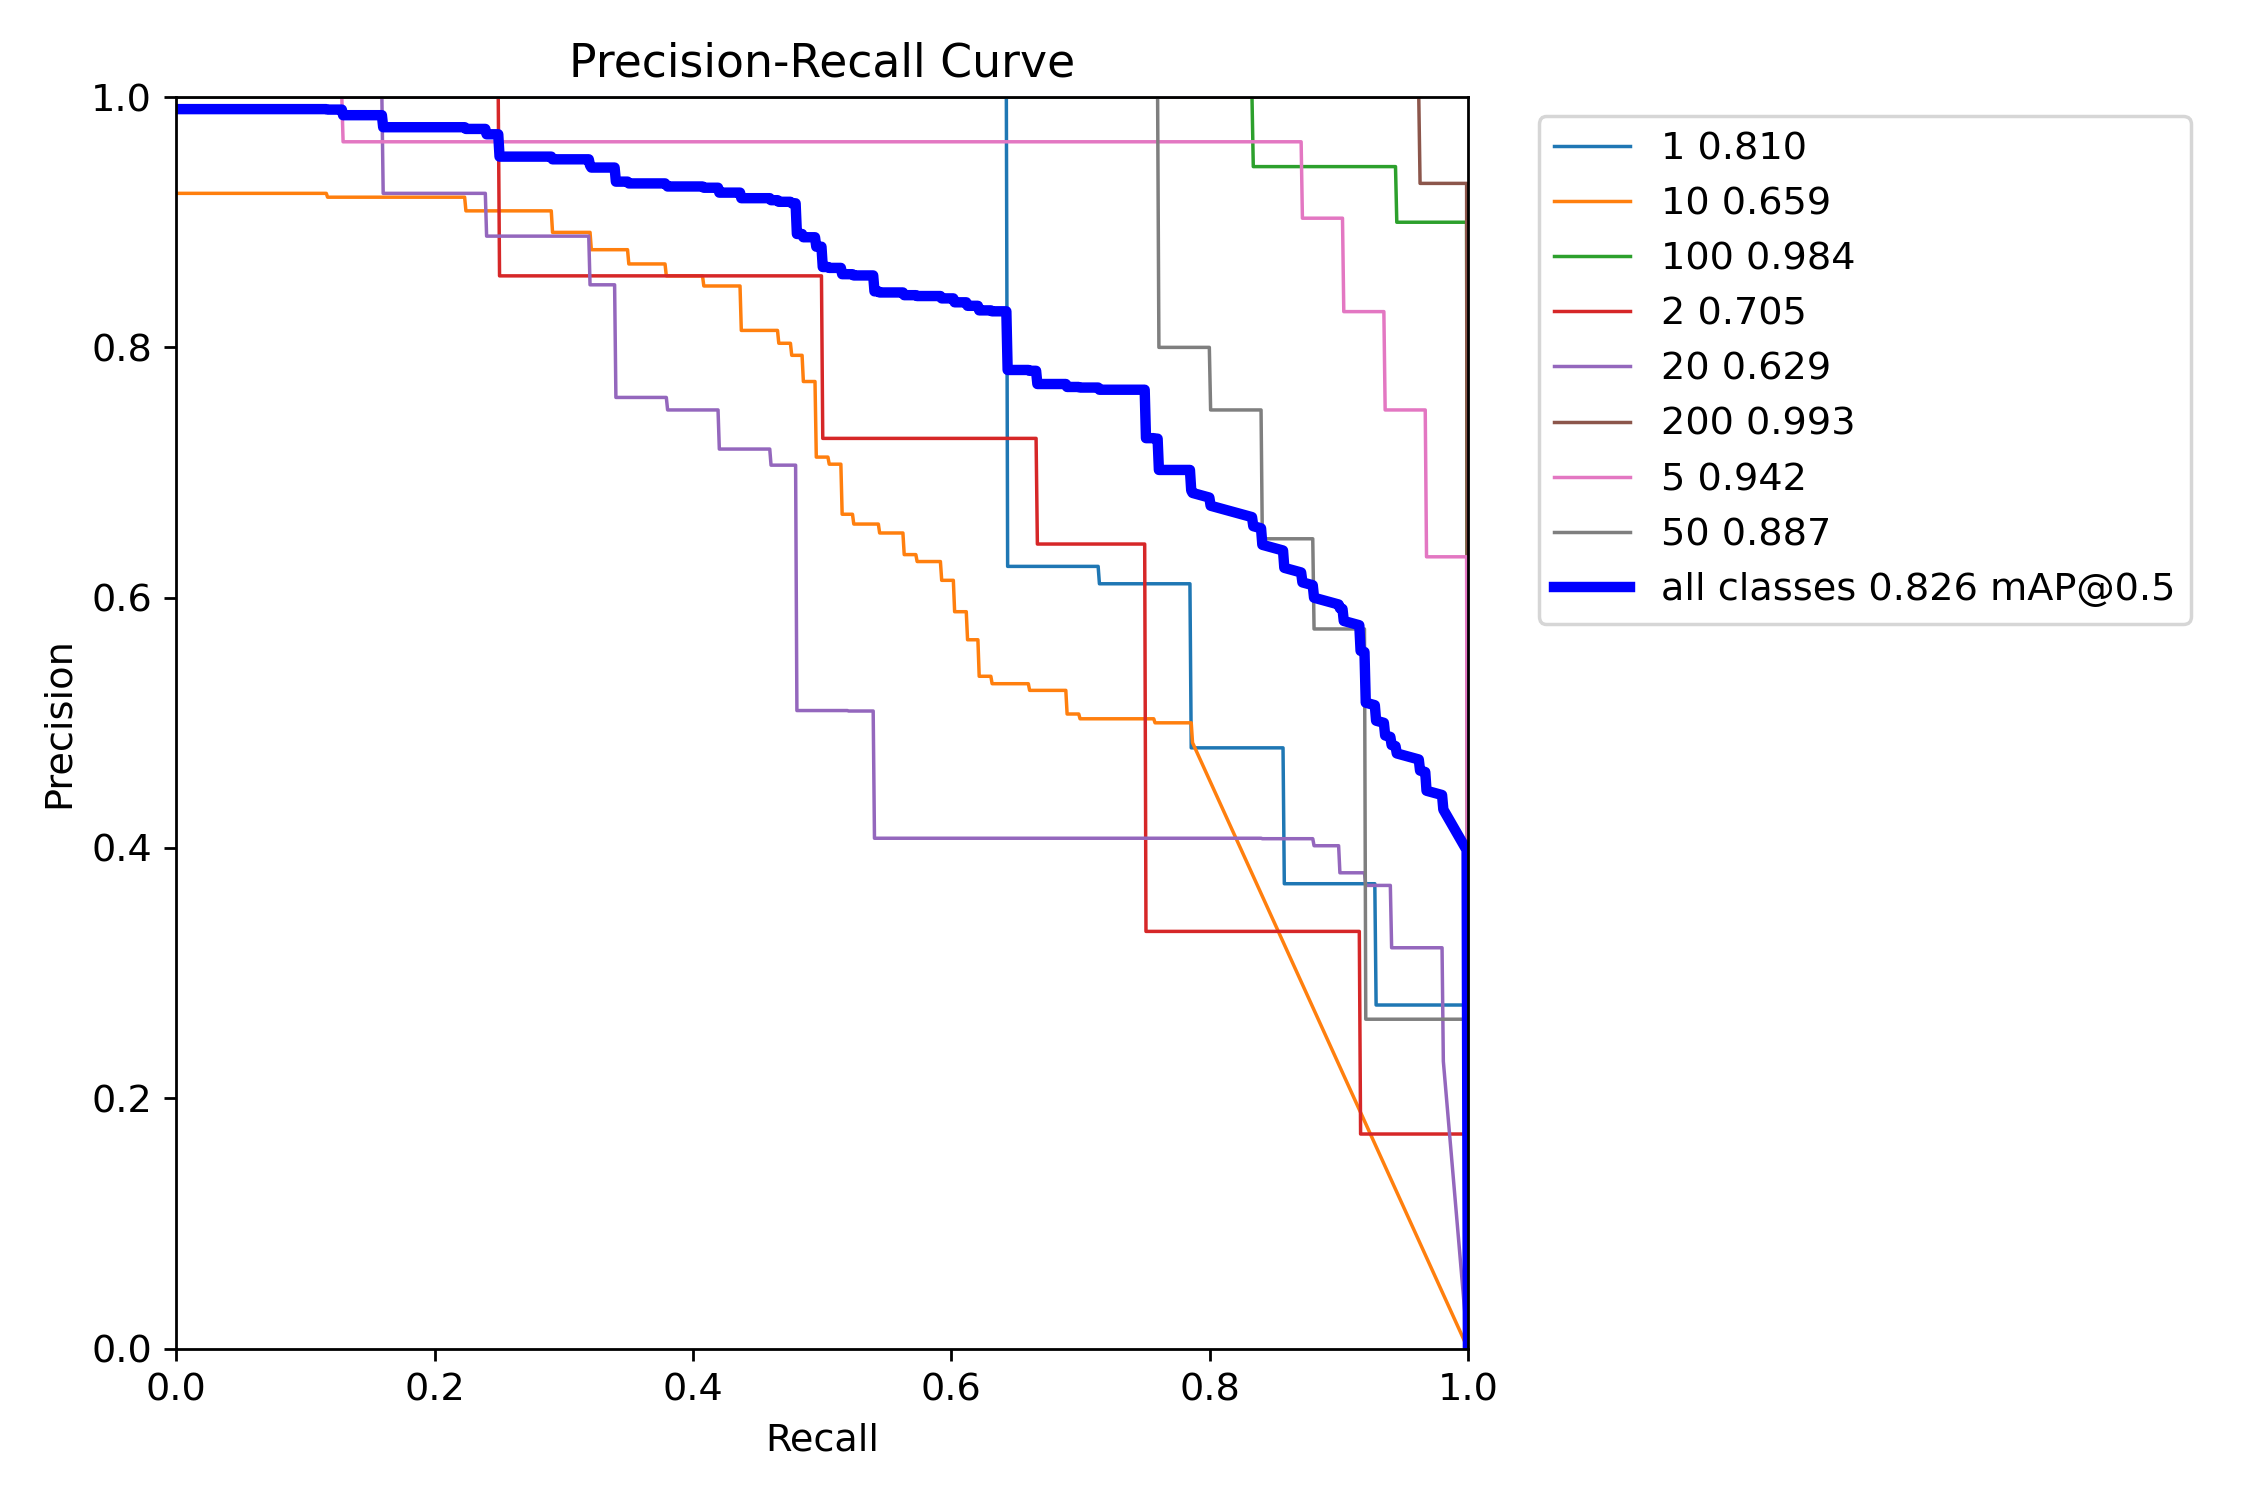

In [2]:
from IPython.display import Image

latest_dir = max( Path("./runs/detect").glob('val*'), key = os.path.getctime )
# print(f"Latest directory: {latest_dir}")

image_files = ['confusion_matrix_normalized.png', 'PR_curve.png']

# Display each image
for image_file in image_files:
    display( Image( filename= latest_dir / image_file ) )

In [3]:
from IPython.display import Markdown

def print_metric(name, value, comment):
    display(Markdown(f"**{name}:** {value:.4f}  \n*{comment}*"))

# Print metrics with comments
print_metric("mAP (50-95)", metrics.box.map, "Mean Average Precision over IoU thresholds 0.50 to 0.95.")
print_metric("mAP@50", metrics.box.map50, "Mean Average Precision at IoU threshold 0.50.")
print_metric("mAP@75", metrics.box.map75, "Mean Average Precision at IoU threshold 0.75.")

# Print per-category mAPs
display(Markdown("**Per-category mAP (50-95):**"))
for i, m in enumerate(metrics.box.maps):
    display(Markdown(f"Category {i}: {m:.4f}"))

**mAP (50-95):** 0.7838  
*Mean Average Precision over IoU thresholds 0.50 to 0.95.*

**mAP@50:** 0.8260  
*Mean Average Precision at IoU threshold 0.50.*

**mAP@75:** 0.8253  
*Mean Average Precision at IoU threshold 0.75.*

**Per-category mAP (50-95):**

Category 0: 0.7502

Category 1: 0.5969

Category 2: 0.9182

Category 3: 0.6883

Category 4: 0.5974

Category 5: 0.9673

Category 6: 0.8948

Category 7: 0.8572